In [61]:
!pip3 install pandas numpy matplotlib openpyxl sklearn sentence-transformers

In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline

In [63]:
# set random seed
import random
random.seed(335)

In [64]:
# magic word
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [65]:
# for better viz
import pprint
import warnings
warnings.filterwarnings('ignore')

In [66]:
#import data

# data location:
path = './'
file_name = 'Online Retail.xlsx'
sheet_name = 'Online Retail'
# read excel file
df = pd.read_excel(path + file_name, sheet_name=sheet_name)

In [67]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,`,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [68]:
from copy import deepcopy

original_df = deepcopy(df)

In [69]:
df = deepcopy(original_df)

# data preparation
---------------------
The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times and not in any prescribed order. Tasks include table, record and attribute selection as well as transformation and cleaning of data for modeling tools.

## select data
----------

### task

Decide on the data to be used for analysis. Criteria include relevance to the data mining goals, quality and technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

### output

List the data to be included/excluded and the reasons for these decisions.

#### select data source

| # | data | included/excluded | reasons | quality | volume/data types |
|:---:|:---|:---|:---|:---|:---|
| 1 |  | included |  |  |  |

#### select attributes & records



### Answer: Select data
#### select data source

Define relevance (probability that product will be relevant) as $Q_{good}/Q_{total}$ where: $Q_{good}$ is quantity that was sold to all customers in same country for given product and $Q_{total}$ is total quantity of goods that was sold in given country.


| # | data | included/excluded | reasons | quality | volume/data types |
|:---:|:---|:---|:---|:---|:---|
| 1 | Online Retail.xlsx | included |<ul> <li> Data contains information about customers: location(country), previous customers' interests. Customer may have interests which depend on location, thus location is needed to predict relevance. Futhermore, custmer may select products regulary that is why InvoiceDate and previous interest (which can be generated from given data) is needed. </li><li> Relevance for product can be generated from given data (as data about customers and quantity are given). </li><li> Data contains information about products: description and unit price. Unit price may also influence of custmers' decision to buy some product. Also, description of product can be used as identifier of product.</li> </ul> |<ul><li> Data contains some rows with incorect information as was described on data understanding stage which can be identified and excluded </li><li> Some cells are empty and should be cleaned.</li></ul>  | <ul><li>string, datetime and float64, int</li><li>23260 distinct InvoiceDate</li><li>1630 distinct UnitPrice</li><li>4372 customers</li></ul> |


#### select attributes & records
For given task following predictors variables will be used:
'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country
- current month (can be generated from InvoiceDate)
- unique Price (can be taken from UnitPrice)
- description (can be taken from Description)
- country (can be taken from Country)
- relevance from previous month (can be generated from Quantity and CustomerID, InvoiceDate)

Target variable is:
- relevance of product(can be generated from Quantity and CustomerID, InvoiceDate)

## clean data
------------------

### task

Raise the data quality to the level required by the selected analysistechniques. This may involve selection of clean subsets of the data, the insertion of suitable defaults or more ambitious techniques such as the estimation of missing data by modeling.

### output

Describe what decisions and actions were taken to address the data quality problems reported during the verify data quality task of the data understanding phase. Transformations of the data for cleaning purposes and the possible impact on the analysis results should be considered.


## Answer: Clear data
- [x] now we need to delete values with incorect StockCode (with no sale)
- [x] remove unused columns: InvoiceNo, StockCode
- [x] remove rows with **Nan** Description or CustomerID
- [x] remove **0.00 price**
- [x] Some **records**  have product **Desctiption** marked with **'?' or NaN**
- [x] there are records which used to describe some internal event but not sale example: **'mouldy, thrown away', 'damages', 'Given away'**. Posible solution remove all rows with lowercase letters


In [70]:
for value in ['POST', 'D', 'DOT', 'M' 'BANK CHARGES',\
                    'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL',\
                    'PADS', 'B', 'CRUK']:
    mask = (df['StockCode']==value)
    df.drop(index=mask[mask].keys(),inplace=True)

In [71]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,`,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [72]:
from datetime import datetime


date = "2011-12-09 12:50:00"

print(datetime.strptime(date, "%Y-%m-%d %H:%M:%S"))

2011-12-09 12:50:00


In [73]:
def invalid_date(date):
    try:
        if isinstance(date, datetime):
            return date
        datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
        return date
    except Exception as e:
        print(e)
        return '??'

df['InvoiceDate'] = df.apply(lambda x: invalid_date(x['InvoiceDate']), axis=1)

df.loc[df['InvoiceDate']=='??', 'InvoiceDate'] = df.InvoiceDate.shift(-1)

df

time data '`' does not match format '%Y-%m-%d %H:%M:%S'


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [74]:
# Reformat the dates to numbers (oen number for date in a year, the other for time of day)

def extract_date_data(date: str):
    if isinstance(date, datetime):
        date = date.strftime("%Y-%m-%d %H:%M:%S")
    date_time = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    day_start = datetime.strptime(date.split()[0] + " 00:00:00", "%Y-%m-%d %H:%M:%S")
    year_start = datetime.strptime(date.split()[0].split('-')[0] + "-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")

    time_of_day = int((date_time - day_start).total_seconds()//60)
    day_of_year = (date_time - year_start).days

    return day_of_year, time_of_day



date_data = df['InvoiceDate'].apply(extract_date_data)

date_data_df = pd.DataFrame(date_data, columns=["Day", "Time"])
# date_data[0].name = 'Day'
# date_data[1].name = 'Time'
# year_data.name = 'Year'te'].apply(lambda date:date.year)
# month_data.name = 'Day'
# df = pd.concat([df,month_data,year_data],axis=1)
print(date_data)

0         (334, 506)
1         (334, 506)
2         (334, 506)
3         (334, 506)
4         (334, 506)
             ...    
541904    (342, 770)
541905    (342, 770)
541906    (342, 770)
541907    (342, 770)
541908    (342, 770)
Name: InvoiceDate, Length: 539721, dtype: object


In [75]:
print(type(date_data))

df[['Day', 'Time']] = pd.DataFrame(date_data.to_frame()['InvoiceDate'].to_list())

df

<class 'pandas.core.series.Series'>


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,334.0,506.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,334.0,506.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,334.0,506.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,334.0,506.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,334.0,506.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,NaN,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,NaN,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,NaN


In [76]:
# remove unnncesary columns
columns = ['InvoiceNo', 'StockCode', 'InvoiceDate'] # remove no columns if array is empty
df = df.drop(columns=columns)

In [77]:
# clean missing data
mask_nan = df.isna().loc[:,['Description','CustomerID', 'Day', 'Time']].any(axis=1)
df.drop(index = mask_nan[mask_nan].keys(),inplace=True)
#clear cells with '?'
mask_question = df['Description']=='?'
df.drop(index = mask_question[mask_question].keys(),inplace=True)

In [78]:
# clean outlier

#clear zero price
mask_zeros = df['UnitPrice']==0
df = df.drop(df[mask_zeros].index)


In [79]:
# clean duplicate records
df = df.drop_duplicates()

In [80]:
df = df.set_index(np.arange(df.shape[0]))

In [81]:
df

,Description,Quantity,UnitPrice,CustomerID,Country,Day,Time
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,334.0,506.0
1,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,334.0,506.0
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,334.0,506.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,334.0,506.0
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,334.0,506.0
...,...,...,...,...,...,...,...
400614,PINK CREAM FELT CRAFT TRINKET BOX,12,1.25,12955.0,United Kingdom,342.0,626.0
400615,MAGIC DRAWING SLATE PURDEY,24,0.42,12955.0,United Kingdom,342.0,626.0
400616,ANTIQUE TALL SWIRLGLASS TRINKET POT,4,3.75,12955.0,United Kingdom,342.0,626.0
400617,PAINT YOUR OWN CANVAS SET,12,1.65,12955.0,United Kingdom,342.0,626.0


In [82]:
df.to_csv('prepared_data.csv')

## construct data
----------

### task

This task includes constructive data preparation operations such as the production of derived attributes, entire new records or transformed values for existing attributes.

### output

#### derived attributes

Derived attributes are new attributes that are constructed from one or more existing attributes in the same record. 

Examples: area = length * width

#### generated records

Describe the creation of completely new records. 

Example: create records for customers who made no purchase during the past year.There was no reason to have such records in the raw data, but for modeling purposes it might make sense to explicitly represent the fact that certain customers made zero purchases.


## Answer:
- [x] current month (can be generated from InvoiceDate)
- [x]  Price (can be taken from UnitPrice)
- [x] country to OneHotEncoding (can be taken from Country)

Target variable is:

- [x] relevance of product(can be generated from Quantity and CustomerID, InvoiceDate)

In [83]:
# derive attributes
# current month (can be generated from InvoiceDate)

# month_data = df['InvoiceDate'].apply(lambda date:date.month)#.month
# year_data = df['InvoiceDate'].apply(lambda date:date.year)#year
# month_data.name = 'Month'
# year_data.name = 'Year'
# df = pd.concat([df,month_data,year_data],axis=1)
# df.head(2)

In [84]:
%%time
# relevance of product(can be generated from Quantity and CustomerID, InvoiceDate)
# total = df.shape[0]
# completed = 0
# notification = 0
# def check(completed,total,notification):
#     if completed/total> 0.25 and notification ==0:
#         print(0.25)
#         return notification +1
#     elif completed/total> 0.5 and notification ==1:
#         print(0.5)
#         return notification +1
#     elif completed/total> 0.75 and notification ==2:
#         print(0.75)
#         return notification +1
    
# df['Satisfaction']=0
# for prod_name in df['Description'].unique():    
#     mask_descr=(df['Description']==prod_name)
        
#     for month in df['Month'].unique():
#         mask_month=(df['Month']==month)        

#         mask = pd.concat([mask_month,mask_descr],axis=1)
#         mask = mask.all(axis=1)
#         mask_total = mask_month
#         df['Satisfaction'][mask] = df['Quantity'][mask].sum()/df['Quantity'][mask_total].sum()
#         completed += mask.sum()
#         notification = check(completed,total,notification)
# df.head(2)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


In [85]:
#normalize
# df['Satisfaction'] = (df['Satisfaction'] - df['Satisfaction'].min())/df['Satisfaction'].max()

In [86]:
# mask = df['Satisfaction']>0.5
# mask_neg = df['Satisfaction']<0.5
# df.loc[mask,'Satisfaction'] = 1
# df.loc[mask_neg,'Satisfaction'] = 0

In [87]:
# df.head(2)

In [88]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
countries = pd.DataFrame(encoder.fit_transform(df[['Country']]).toarray(),columns=encoder.categories_[0])
encoder
df = pd.concat([df,countries],axis=1)


df

,Description,Quantity,UnitPrice,CustomerID,Country,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,PINK CREAM FELT CRAFT TRINKET BOX,12,1.25,12955.0,United Kingdom,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400615,MAGIC DRAWING SLATE PURDEY,24,0.42,12955.0,United Kingdom,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400616,ANTIQUE TALL SWIRLGLASS TRINKET POT,4,3.75,12955.0,United Kingdom,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400617,PAINT YOUR OWN CANVAS SET,12,1.65,12955.0,United Kingdom,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
df = df.drop(['Country'],axis=1)
df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,WHITE METAL LANTERN,6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,PINK CREAM FELT CRAFT TRINKET BOX,12,1.25,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400615,MAGIC DRAWING SLATE PURDEY,24,0.42,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400616,ANTIQUE TALL SWIRLGLASS TRINKET POT,4,3.75,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400617,PAINT YOUR OWN CANVAS SET,12,1.65,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
# import torch
# from sentence_transformers import SentenceTransformer
# sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [91]:
# sbert_model.to("cuda")

# sentence_embeddings = sbert_model.encode(df['Description'])

# print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

In [92]:
!pip install nltk

In [93]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [94]:
df['Description'] = df.apply(lambda x: word_tokenize(x['Description'].lower()), axis=1)

df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,"[white, hanging, heart, t-light, holder]",6,2.55,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"[white, metal, lantern]",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,"[cream, cupid, hearts, coat, hanger]",8,2.75,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,"[knitted, union, flag, hot, water, bottle]",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,"[red, woolly, hottie, white, heart, .]",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,"[pink, cream, felt, craft, trinket, box]",12,1.25,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400615,"[magic, drawing, slate, purdey]",24,0.42,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400616,"[antique, tall, swirlglass, trinket, pot]",4,3.75,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400617,"[paint, your, own, canvas, set]",12,1.65,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
! pip install gensim

In [96]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


df['Index'] = df.index
df['Description'] = df.apply(lambda x: TaggedDocument(x['Description'], [x['Index']]), axis=1)
df.drop(['Index'], axis=1)
df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,Index
0,"([white, hanging, heart, t-light, holder], [0])",6,2.55,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,"([white, metal, lantern], [1])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,"([cream, cupid, hearts, coat, hanger], [2])",8,2.75,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,"([knitted, union, flag, hot, water, bottle], [3])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
4,"([red, woolly, hottie, white, heart, .], [4])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,"([pink, cream, felt, craft, trinket, box], [40...",12,1.25,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,400614
400615,"([magic, drawing, slate, purdey], [400615])",24,0.42,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,400615
400616,"([antique, tall, swirlglass, trinket, pot], [4...",4,3.75,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,400616
400617,"([paint, your, own, canvas, set], [400617])",12,1.65,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,400617


In [97]:
model = Doc2Vec(df['Description'], vector_size = 10, window = 2, min_count = 1, epochs = 10)

In [98]:
df['Index'] = df.index

df['DescriptionVector'] = df.apply(lambda x: model.docvecs[x['Index']], axis=1)

df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,Index,DescriptionVector
0,"([white, hanging, heart, t-light, holder], [0])",6,2.55,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,"[0.023292102, -0.022815276, -0.04610524, 0.087..."
1,"([white, metal, lantern], [1])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,"[0.11536636, 0.009575432, -0.08310674, 0.12637..."
2,"([cream, cupid, hearts, coat, hanger], [2])",8,2.75,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,"[0.035412278, 0.046959292, 0.077158, 0.0002908..."
3,"([knitted, union, flag, hot, water, bottle], [3])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,"[0.084003784, -0.010184567, -0.057661895, 0.05..."
4,"([red, woolly, hottie, white, heart, .], [4])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,"[-0.03888509, 0.06817194, 0.026102087, -0.0273..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,"([pink, cream, felt, craft, trinket, box], [40...",12,1.25,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,400614,"[-0.0622856, 0.066643216, 0.031889524, 0.01047..."
400615,"([magic, drawing, slate, purdey], [400615])",24,0.42,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,400615,"[0.0054176077, 0.01244143, -0.010175921, 0.074..."
400616,"([antique, tall, swirlglass, trinket, pot], [4...",4,3.75,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,400616,"[-0.038379222, -0.008161618, -0.0016472149, 0...."
400617,"([paint, your, own, canvas, set], [400617])",12,1.65,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,400617,"[0.033746447, -0.018491434, 0.04396271, 0.0350..."


In [99]:
df.drop(columns=['Index'], inplace=True)

df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,DescriptionVector
0,"([white, hanging, heart, t-light, holder], [0])",6,2.55,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.023292102, -0.022815276, -0.04610524, 0.087..."
1,"([white, metal, lantern], [1])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.11536636, 0.009575432, -0.08310674, 0.12637..."
2,"([cream, cupid, hearts, coat, hanger], [2])",8,2.75,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.035412278, 0.046959292, 0.077158, 0.0002908..."
3,"([knitted, union, flag, hot, water, bottle], [3])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.084003784, -0.010184567, -0.057661895, 0.05..."
4,"([red, woolly, hottie, white, heart, .], [4])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[-0.03888509, 0.06817194, 0.026102087, -0.0273..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,"([pink, cream, felt, craft, trinket, box], [40...",12,1.25,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[-0.0622856, 0.066643216, 0.031889524, 0.01047..."
400615,"([magic, drawing, slate, purdey], [400615])",24,0.42,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.0054176077, 0.01244143, -0.010175921, 0.074..."
400616,"([antique, tall, swirlglass, trinket, pot], [4...",4,3.75,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[-0.038379222, -0.008161618, -0.0016472149, 0...."
400617,"([paint, your, own, canvas, set], [400617])",12,1.65,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.033746447, -0.018491434, 0.04396271, 0.0350..."


In [100]:
df[[f'Description{i}' for i in range(10)]] = pd.DataFrame(df['DescriptionVector'].to_list(), index=df.index)

df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,DescriptionVector,Description0,Description1,Description2,Description3,Description4,Description5,Description6,Description7,Description8,Description9
0,"([white, hanging, heart, t-light, holder], [0])",6,2.55,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.023292102, -0.022815276, -0.04610524, 0.087...",0.023292,-0.022815,-0.046105,0.087558,0.056800,-0.063572,0.050534,0.089342,-0.132620,0.093166
1,"([white, metal, lantern], [1])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.11536636, 0.009575432, -0.08310674, 0.12637...",0.115366,0.009575,-0.083107,0.126377,0.039645,-0.119833,-0.023091,0.131863,-0.117057,0.091245
2,"([cream, cupid, hearts, coat, hanger], [2])",8,2.75,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.035412278, 0.046959292, 0.077158, 0.0002908...",0.035412,0.046959,0.077158,0.000291,0.018548,0.036693,0.037558,0.024806,0.014215,-0.068180
3,"([knitted, union, flag, hot, water, bottle], [3])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.084003784, -0.010184567, -0.057661895, 0.05...",0.084004,-0.010185,-0.057662,0.058797,0.027728,0.022285,-0.022857,-0.021383,0.007953,-0.027411
4,"([red, woolly, hottie, white, heart, .], [4])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[-0.03888509, 0.06817194, 0.026102087, -0.0273...",-0.038885,0.068172,0.026102,-0.027375,-0.014133,0.021451,0.021898,0.029885,0.026420,0.086822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,"([pink, cream, felt, craft, trinket, box], [40...",12,1.25,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[-0.0622856, 0.066643216, 0.031889524, 0.01047...",-0.062286,0.066643,0.031890,0.010472,-0.061201,-0.115329,0.095758,-0.082660,-0.055326,0.042391
400615,"([magic, drawing, slate, purdey], [400615])",24,0.42,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.0054176077, 0.01244143, -0.010175921, 0.074...",0.005418,0.012441,-0.010176,0.074938,0.017467,-0.091193,0.020235,-0.030124,-0.074592,0.102630
400616,"([antique, tall, swirlglass, trinket, pot], [4...",4,3.75,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[-0.038379222, -0.008161618, -0.0016472149, 0....",-0.038379,-0.008162,-0.001647,0.053008,-0.036292,-0.127869,-0.023052,0.067579,0.023862,0.013519
400617,"([paint, your, own, canvas, set], [400617])",12,1.65,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.033746447, -0.018491434, 0.04

In [101]:
df = df.drop(columns=['DescriptionVector'])

df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,Description0,Description1,Description2,Description3,Description4,Description5,Description6,Description7,Description8,Description9
0,"([white, hanging, heart, t-light, holder], [0])",6,2.55,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.023292,-0.022815,-0.046105,0.087558,0.056800,-0.063572,0.050534,0.089342,-0.132620,0.093166
1,"([white, metal, lantern], [1])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.115366,0.009575,-0.083107,0.126377,0.039645,-0.119833,-0.023091,0.131863,-0.117057,0.091245
2,"([cream, cupid, hearts, coat, hanger], [2])",8,2.75,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.035412,0.046959,0.077158,0.000291,0.018548,0.036693,0.037558,0.024806,0.014215,-0.068180
3,"([knitted, union, flag, hot, water, bottle], [3])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.084004,-0.010185,-0.057662,0.058797,0.027728,0.022285,-0.022857,-0.021383,0.007953,-0.027411
4,"([red, woolly, hottie, white, heart, .], [4])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.038885,0.068172,0.026102,-0.027375,-0.014133,0.021451,0.021898,0.029885,0.026420,0.086822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,"([pink, cream, felt, craft, trinket, box], [40...",12,1.25,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.062286,0.066643,0.031890,0.010472,-0.061201,-0.115329,0.095758,-0.082660,-0.055326,0.042391
400615,"([magic, drawing, slate, purdey], [400615])",24,0.42,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.005418,0.012441,-0.010176,0.074938,0.017467,-0.091193,0.020235,-0.030124,-0.074592,0.102630
400616,"([antique, tall, swirlglass, trinket, pot], [4...",4,3.75,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.038379,-0.008162,-0.001647,0.053008,-0.036292,-0.127869,-0.023052,0.067579,0.023862,0.013519
400617,"([paint, your, own, canvas, set], [400617])",12,1.65,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.033746,-0.018491,0.043963,0.035077,0.025065,-0.016211,-0.024112,0.057282,-0.077516,0.051668


In [102]:
# Save the model
model.save('./sentence_vectorizer.model')

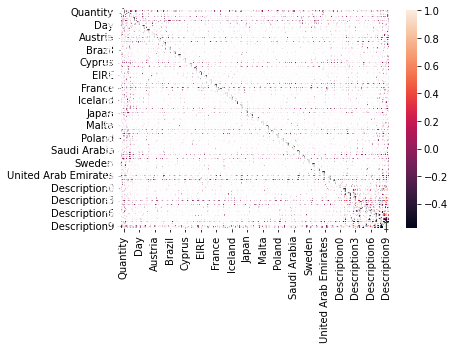

In [103]:
import seaborn as sn

sn.heatmap(df.corr(), annot=True)
plt.show()

In [48]:

from sklearn.cluster import DBSCAN, kmeans_plusplus, KMeans

clustering_data = df.loc[:, 'Description0':].values

db = KMeans(5).fit_predict(clustering_data)

# db = DBSCAN(eps=0.3, min_samples=2, metric='cosine', algorithm='brute')
# db.fit(clustering_data)
#print(db.labels_)

print(db)

[0 0 1 ... 3 2 1]


In [51]:
df['DescriptionCluster'] = db

In [52]:
df.drop(columns=['cluster'], inplace=True)

In [53]:
df.drop(columns=[f"Description{i}" for i in range(10)], inplace=True)

In [54]:
df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,DescriptionCluster
0,"([white, hanging, heart, t-light, holder], [0])",6,2.55,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,"([white, metal, lantern], [1])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,"([cream, cupid, hearts, coat, hanger], [2])",8,2.75,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,"([knitted, union, flag, hot, water, bottle], [3])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
4,"([red, woolly, hottie, white, heart, .], [4])",6,3.39,17850.0,334.0,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400614,"([pink, cream, felt, craft, trinket, box], [40...",12,1.25,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
400615,"([magic, drawing, slate, purdey], [400615])",24,0.42,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
400616,"([antique, tall, swirlglass, trinket, pot], [4...",4,3.75,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
400617,"([paint, your, own, canvas, set], [400617])",12,1.65,12955.0,342.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [55]:
from sklearn.decomposition import PCA

df[[f'Country{i}' for i in range(3)]] = PCA(n_components=3, svd_solver='arpack').fit_transform(df.loc[:, 'Australia':'Unspecified'])

df.drop(df.columns.to_series()['Australia':'Unspecified'], axis=1, inplace=True)

df

,Description,Quantity,UnitPrice,CustomerID,Day,Time,DescriptionCluster,Country0,Country1,Country2
0,"([white, hanging, heart, t-light, holder], [0])",6,2.55,17850.0,334.0,506.0,0,-0.11515,0.000826,-0.000657
1,"([white, metal, lantern], [1])",6,3.39,17850.0,334.0,506.0,0,-0.11515,0.000826,-0.000657
2,"([cream, cupid, hearts, coat, hanger], [2])",8,2.75,17850.0,334.0,506.0,1,-0.11515,0.000826,-0.000657
3,"([knitted, union, flag, hot, water, bottle], [3])",6,3.39,17850.0,334.0,506.0,3,-0.11515,0.000826,-0.000657
4,"([red, woolly, hottie, white, heart, .], [4])",6,3.39,17850.0,334.0,506.0,1,-0.11515,0.000826,-0.000657
...,...,...,...,...,...,...,...,...,...,...
400614,"([pink, cream, felt, craft, trinket, box], [40...",12,1.25,12955.0,342.0,626.0,3,-0.11515,0.000826,-0.000657
400615,"([magic, drawing, slate, purdey], [400615])",24,0.42,12955.0,342.0,626.0,2,-0.11515,0.000826,-0.000657
400616,"([antique, tall, swirlglass, trinket, pot], [4...",4,3.75,12955.0,342.0,626.0,3,-0.11515,0.000826,-0.000657
400617,"([paint, your, own, canvas, set], [400617])",12,1.65,12955.0,342.0,626.0,2,-0.11515,0.000826,-0.000657


In [56]:
df.drop(columns=['Description'], inplace=True)

df

,Quantity,UnitPrice,CustomerID,Day,Time,DescriptionCluster,Country0,Country1,Country2
0,6,2.55,17850.0,334.0,506.0,0,-0.11515,0.000826,-0.000657
1,6,3.39,17850.0,334.0,506.0,0,-0.11515,0.000826,-0.000657
2,8,2.75,17850.0,334.0,506.0,1,-0.11515,0.000826,-0.000657
3,6,3.39,17850.0,334.0,506.0,3,-0.11515,0.000826,-0.000657
4,6,3.39,17850.0,334.0,506.0,1,-0.11515,0.000826,-0.000657
...,...,...,...,...,...,...,...,...,...
400614,12,1.25,12955.0,342.0,626.0,3,-0.11515,0.000826,-0.000657
400615,24,0.42,12955.0,342.0,626.0,2,-0.11515,0.000826,-0.000657
400616,4,3.75,12955.0,342.0,626.0,3,-0.11515,0.000826,-0.000657
400617,12,1.65,12955.0,342.0,626.0,2,-0.11515,0.000826,-0.000657


In [57]:
normalized_df=(df-df.min())/(df.max()-df.min())

normalized_df['UnitPrice'] = df['UnitPrice']

In [58]:
normalized_df.to_csv('./prepared_data.csv')

In [59]:
normalized_df

,Quantity,UnitPrice,CustomerID,Day,Time,DescriptionCluster,Country0,Country1,Country2
0,0.500040,2.55,0.926443,0.937677,0.156682,0.00,0.0,0.427772,0.422559
1,0.500040,3.39,0.926443,0.937677,0.156682,0.00,0.0,0.427772,0.422559
2,0.500054,2.75,0.926443,0.937677,0.156682,0.25,0.0,0.427772,0.422559
3,0.500040,3.39,0.926443,0.937677,0.156682,0.75,0.0,0.427772,0.422559
4,0.500040,3.39,0.926443,0.937677,0.156682,0.25,0.0,0.427772,0.422559
...,...,...,...,...,...,...,...,...,...
400614,0.500081,1.25,0.102508,0.960340,0.294931,0.75,0.0,0.427772,0.422559
400615,0.500162,0.42,0.102508,0.960340,0.294931,0.50,0.0,0.427772,0.422559
400616,0.500027,3.75,0.102508,0.960340,0.294931,0.75,0.0,0.427772,0.422559
400617,0.500081,1.65,0.102508,0.960340,0.294931,0.50,0.0,0.427772,0.422559


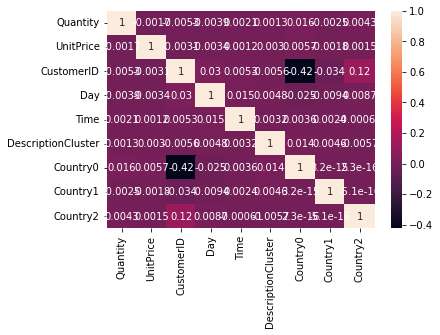

In [60]:
import seaborn as sn

sn.heatmap(df.corr(), annot=True)
plt.show()

## integrate data
-------------

### task

These are methods whereby information is combined from multiple tables or records to create new records or values.

### output

Merging tables refers to joining together two or more tables that have different information about the same objects. 

Example: a retail chainhas one table with information about each store's general characteristics(e.g., floor space, type of mall), another table with summarized sales data (e.g., profit, percent change in sales from previous year) and another with information about the demographics of the surrounding area. Each of these tables contains one record for each store. These tables can be merged together into a new table with one record foreach store, combining fields from the source tables.

Merged data also covers aggregations. Aggregation refers to operations where new values are computed by summarizing together information from multiple records and/or tables. For example, converting a table ofcustomer purchases where there is one record for each purchase into a new table where there is one record for each customer, with fields such as number of purchases, average purchase amount, percent of orders charged to credit card, percent of items under promotion, etc.


### Answer
We only have one table here, so the data integration does not apply for our case.


# format data
----------------

### task

Formatting transformations refer to primarily syntactic modifications made to the data that do not change its meaning, but might be required by the modeling tool.

### output

Some tools have requirements on the order of the attributes, such as the first field being a unique identifier for each record or the last field being the outcome field the model is to predict.

It might be important to change the order of the records in the dataset. Perhaps the modeling tool requires that the records be sorted according to the value of the outcome attribute. A common situation is that the records of the dataset are initially ordered in some way but the modeling algorithm needs them to be in a fairly random order. For example, when using neural networks it is generally best for the records to be presented in a random order although some tools handle this automatically with-out explicit user intervention.

Additionally, there are purely syntactic changes made to satisfy the requirements of the specific modeling tool. 

Examples: removing commas from within text fields in comma-delimited data files, trimming all values to a maximum of 32 characters.


In [ ]:
# country_col = df.columns.to_list()
# country_col=country_col[country_col.index('Australia'):]
# country_col.append('Satisfaction')

In [ ]:
# columns=['Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Month']+country_col
# df = df[columns]
# df.head(2)

In [ ]:
df.head(2)

,Quantity,UnitPrice,CustomerID,Day,Time,Description0,Description1,Description2,Description3,Description4,Description5,Description6,Description7,Description8,Description9,Country0,Country1,Country2,Country3,Country4
0,6,2.55,17850.0,334.0,506.0,-0.048192,-0.067113,0.091345,-0.010604,0.097196,-0.000055,0.032846,-0.002929,-0.234980,-0.057216,-0.11515,0.000826,-0.000657,-0.002696,0.000137
1,6,3.39,17850.0,334.0,506.0,0.107611,0.052301,0.141548,-0.160777,0.046629,-0.131703,0.102536,0.171800,-0.150113,-0.205351,-0.11515,0.000826,-0.000657,-0.002696,0.000137


In [ ]:
# df.to_csv('./data/OnlineRetail.csv')

## note/questions
-------------

#### select data

#### clean data

#### construct data

#### integrate data

#### format data

